In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

tf.Datasets will take **images as input, in batches**

In [6]:
!unzip Potato_disease.zip

Archive:  Potato_disease.zip
   creating: Potato disease/Potato___Early_blight/
  inflating: Potato disease/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: Potato disease/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: Potato disease/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: Potato disease/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: Potato disease/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: Potato disease/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: Potato disease/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: Potato disease/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: Potato disease/Pota

# ***Loading the dataset*** <br>
**image_dataset_from_directory:** loads all images into the tf dataset

In [2]:
IMAGE_SIZE = 256 #check image size in the image's properties
BATCH_SIZE = 32 # 32 is standard batch size
CHANNELS = 3 # R,G,B channels"
EPOCHS = 20

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato disease',
    shuffle=True, #shuffles images and loads them
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Since we gave the **batch size as 32, we have 68 elements/ batches** in the dataset, where **each element is a batch of 32 images**

In [10]:
len(dataset)

68

**image_batch:**

images - 32 <br>
image size - 256x256 <br>
channels - 3 (R,G,B) <br>

**label_batch:**
Potato___Early_blight - 0, Potato___Late_blight - 1, Potato_healthy - 2

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) # Every element is a tensor, so we need to convert to numpy

(32, 256, 256, 3)
[1 0 0 0 0 2 0 2 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 2 1 1]


# ***Printing the first image: image is a tensor. (i.e tf.Tensor)***

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])


tf.Tensor(
[[[155. 149. 159.]
  [161. 155. 165.]
  [168. 162. 172.]
  ...
  [139. 134. 141.]
  [138. 133. 140.]
  [134. 129. 136.]]

 [[160. 154. 164.]
  [164. 158. 168.]
  [167. 161. 171.]
  ...
  [140. 135. 142.]
  [136. 131. 138.]
  [127. 122. 129.]]

 [[161. 155. 165.]
  [162. 156. 166.]
  [164. 158. 168.]
  ...
  [131. 126. 133.]
  [141. 136. 143.]
  [137. 132. 139.]]

 ...

 [[150. 145. 151.]
  [148. 143. 149.]
  [147. 142. 148.]
  ...
  [ 99.  93.  97.]
  [ 95.  89.  93.]
  [ 93.  87.  91.]]

 [[150. 145. 151.]
  [151. 146. 152.]
  [152. 147. 153.]
  ...
  [ 96.  90.  94.]
  [ 94.  88.  92.]
  [ 92.  86.  90.]]

 [[142. 137. 143.]
  [146. 141. 147.]
  [149. 144. 150.]
  ...
  [ 91.  85.  89.]
  [ 90.  84.  88.]
  [ 89.  83.  87.]]], shape=(256, 256, 3), dtype=float32)


# ***Converting tensor to numpy: All numbers are between 0 and 255, representing colors***

In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[124. 123. 141.]
  [109. 108. 126.]
  [ 97.  96. 114.]
  ...
  [149. 147. 161.]
  [168. 166. 180.]
  [163. 161. 175.]]

 [[108. 107. 125.]
  [119. 118. 136.]
  [132. 131. 149.]
  ...
  [137. 135. 149.]
  [121. 119. 133.]
  [170. 168. 182.]]

 [[116. 115. 131.]
  [112. 111. 127.]
  [115. 114. 130.]
  ...
  [168. 166. 180.]
  [183. 181. 195.]
  [179. 177. 191.]]

 ...

 [[146. 148. 161.]
  [154. 156. 169.]
  [153. 155. 168.]
  ...
  [183. 185. 198.]
  [200. 202. 215.]
  [182. 184. 197.]]

 [[144. 146. 159.]
  [150. 152. 165.]
  [153. 155. 168.]
  ...
  [198. 200. 213.]
  [189. 191. 204.]
  [148. 150. 163.]]

 [[152. 154. 167.]
  [153. 155. 168.]
  [159. 161. 174.]
  ...
  [170. 172. 185.]
  [196. 198. 211.]
  [182. 184. 197.]]]


In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


# ***Visualising the image*** <br>
imshow() expects a 3D array, since it was float, we convert into int

Every time the below cell is run, we get different images,since shuffle is true

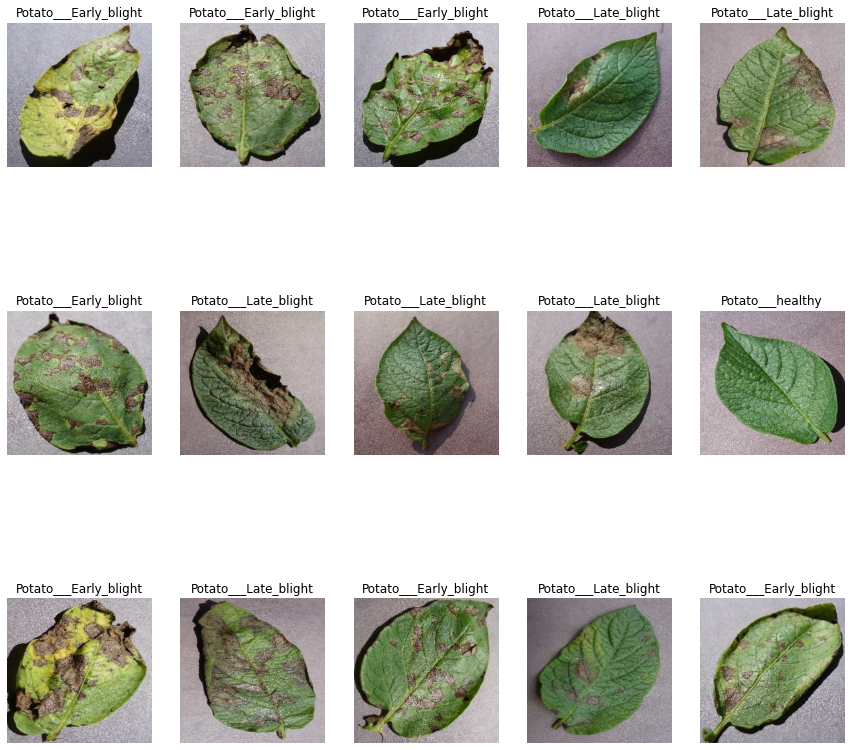

In [15]:
#increase the dimension of images to be displayed on plt.
plt.figure(figsize=(15,15))

for image_batch, label_batch in dataset.take(1):
    #displaying 15 images from the first batch of 32 images
    for i in range(15):
        #to show the 15 images as a matrix
        ax = plt.subplot(3,5, i+1)
        
        plt.imshow(image_batch[i].numpy().astype('uint8')) 

        # Displaying the label of first image in the class
        plt.title(class_names[label_batch[i]]) 

        # to hide the axis numbers
        plt.axis('off') 
    

# ***Splitting the data set into training and testing set:***
## ***80% as training, 20% as testing*** 


---

Validation set is used during training. We **validate after each epoch**<br>
## **20% test - 10% as validation, 10% test**

In [16]:
train_size = 0.8 #80%

#len(dataset) = 68.
len(dataset) * train_size 

54.400000000000006

We have **54 * 32 images for training**

In [17]:
#taking first 54 batches.
train_ds = dataset.take(54)
len(train_ds)

54

Skipping first 54 batches, taking the **rest for test**

In [18]:
test_ds = dataset.skip(54)
len(test_ds)

14

Taking **6 batches for validation and 8 for test**

In [19]:
val_size = 0.1 #10%
len(dataset) * val_size

6.800000000000001

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

8

Writing a **python function for above steps**

In [22]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    # 80% of the dataset for training, converting to int because prev, we got float
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    
    #10% of the dataset for validation
    val_size = int(val_split * ds_size)
    val_ds = ds.skip(train_size).take(val_size)

    #Skip train_size = 80% and val_size=10%. Take 10% for test
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

# ***Cache() reads image and stores the image, for next iteration***
Improves pipeline performance <br>
If CPU/ GPU is busy training, prefetch() loads next set of batch frm disk***

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# ***Data Augmentation: to make the model robust***
**if image is rotated, or zoomed in, color contrast, performance will be affected**

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# ***Building the MODEL:***
**kernel_size:** 3 x 3 <br>
**filters:** <br>
Consider an image of Koala: <br>
one filter to detect eyes, another to detect ears, etc <br>
**CONVOLUTIONAL AND PULLING LAYERS ----> TRIAL AND ERROR**

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    #32 layers = trial and error
    #layers.Conv2D(filters, kernel_size, activation, input_shape)
    layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Whatever is there in last pooling layer, needs to be FLATTENED 
    #so that its an ARRAY OF NEURONS
    layers.Flatten(),
    
    #After flattening, we can have a HIDDEN DENSE LAYER
    
    #First dense layer has 64 neurons
    layers.Dense(64, activation = 'relu'),
    #Second dense layer has 3 neurons.
    #softmax normalises probability of the classes
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

**Trainable params are the weights**

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1, #to print many outputs to check whats going on
    validation_data = val_ds
)

54/54 [==============================] - 21s 116ms/step - loss: 0.8508 - accuracy: 0.5156 - val_loss: 0.6190 - val_accuracy: 0.7344
Epoch 2/20
54/54 [==============================] - 4s 70ms/step - loss: 0.5447 - accuracy: 0.7465 - val_loss: 0.4548 - val_accuracy: 0.8021
Epoch 3/20
54/54 [==============================] - 4s 70ms/step - loss: 0.3795 - accuracy: 0.8333 - val_loss: 0.4215 - val_accuracy: 0.8125
Epoch 4/20
54/54 [==============================] - 4s 70ms/step - loss: 0.3091 - accuracy: 0.8628 - val_loss: 0.2166 - val_accuracy: 0.9167
Epoch 5/20
54/54 [==============================] - 4s 70ms/step - loss: 0.2341 - accuracy: 0.9080 - val_loss: 0.1858 - val_accuracy: 0.9271
Epoch 6/20
54/54 [==============================] - 4s 70ms/step - loss: 0.1748 - accuracy: 0.9329 - val_loss: 0.1411 - val_accuracy: 0.9427
Epoch 7/20
54/54 [==============================] - 4s 72ms/step - loss: 0.1870 - accuracy: 0.9230 - val_loss: 0.3706 - val_accuracy: 0.8281
Epoch 8/20
54/54 [====

# ***Model should be tested on test data before deploying***

In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 34ms/step - loss: 0.0429 - accuracy: 0.9844


In [35]:
scores ##1st param: loss, 2nd param: accuracy

[0.04286233335733414, 0.984375]

# ***Plot training history on graph***

In [36]:
history

**Above cell says model is keras callback history**

In [37]:
history.params

{'epochs': 20, 'steps': 54, 'verbose': 1}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history.history['accuracy']

[0.515625,
 0.7465277910232544,
 0.8333333134651184,
 0.8628472089767456,
 0.9079861044883728,
 0.9328703880310059,
 0.9230324029922485,
 0.9201388955116272,
 0.9415509104728699,
 0.9513888955116272,
 0.9658564925193787,
 0.9583333134651184,
 0.9560185074806213,
 0.9745370149612427,
 0.96875,
 0.9774305820465088,
 0.9646990895271301,
 0.9646990895271301,
 0.9768518805503845,
 0.9849537014961243]

# ***Plotting the loss vs accuracy for validation***

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ***Plotting the training vs validation - accuracy and loss graphs***

Text(0.5, 1.0, 'Training and Validation Loss')

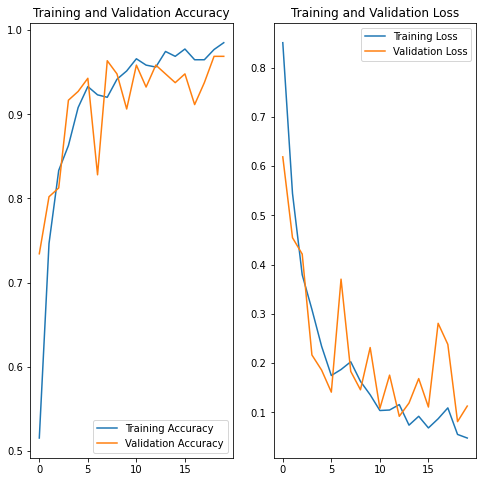

In [41]:
# Accuracy

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# ***Making predictions/inferences on sample images***

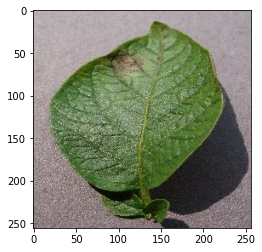

In [42]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

Representing **above image as a 3D array**

In [43]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))

[[[172 173 191]
  [173 174 192]
  [173 174 192]
  ...
  [162 167 187]
  [161 166 186]
  [160 165 185]]

 [[169 170 188]
  [169 170 188]
  [169 170 188]
  ...
  [162 167 187]
  [161 166 186]
  [160 165 185]]

 [[167 168 186]
  [167 168 186]
  [167 168 186]
  ...
  [163 168 188]
  [162 167 187]
  [161 166 186]]

 ...

 [[106 104 117]
  [105 103 116]
  [ 97  95 108]
  ...
  [124 126 147]
  [124 126 147]
  [114 116 137]]

 [[128 126 139]
  [130 128 141]
  [113 111 124]
  ...
  [117 119 140]
  [108 110 131]
  [108 110 131]]

 [[115 113 126]
  [127 125 138]
  [116 114 127]
  ...
  [122 124 145]
  [ 89  91 112]
  [106 108 129]]]


First image to predict
Actual label:  Potato___Late_blight
Predicted Label:  Potato___Late_blight


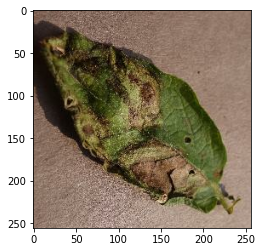

In [44]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    
    print("Actual label: ", class_names[first_label])
    
    #Prediction for 32 images
    batch_prediction = model.predict(images_batch)
    
    #Prediction for 1st image
    print('Predicted Label: ',class_names[np.argmax(batch_prediction[0])])
        

We see a **3D array of PROBABILITY VALUES** because in **DENSE LAYER**,
we mentioned **n_classes = 3, activation as 'softmax'**. <br>
One of those 3 probability values is the highest i.e <br>
**IMAGE BELONGS TO THE CLASS WITH HIGHEST PROB. VALUE**

In [45]:
np.argmax([9.9821883e-01,1.7806785e-03, 4.8869288e-07])

0

In [46]:
def predict(model, img):
    #Converting image into image array
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    
    # Create a batch
    img_array = tf.expand_dims(img_array, 0) 
    
    #Calling prediction function
    predictions = model.predict(img_array)
    
    #Find predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence #gives the prediction class and confidence about the prediction

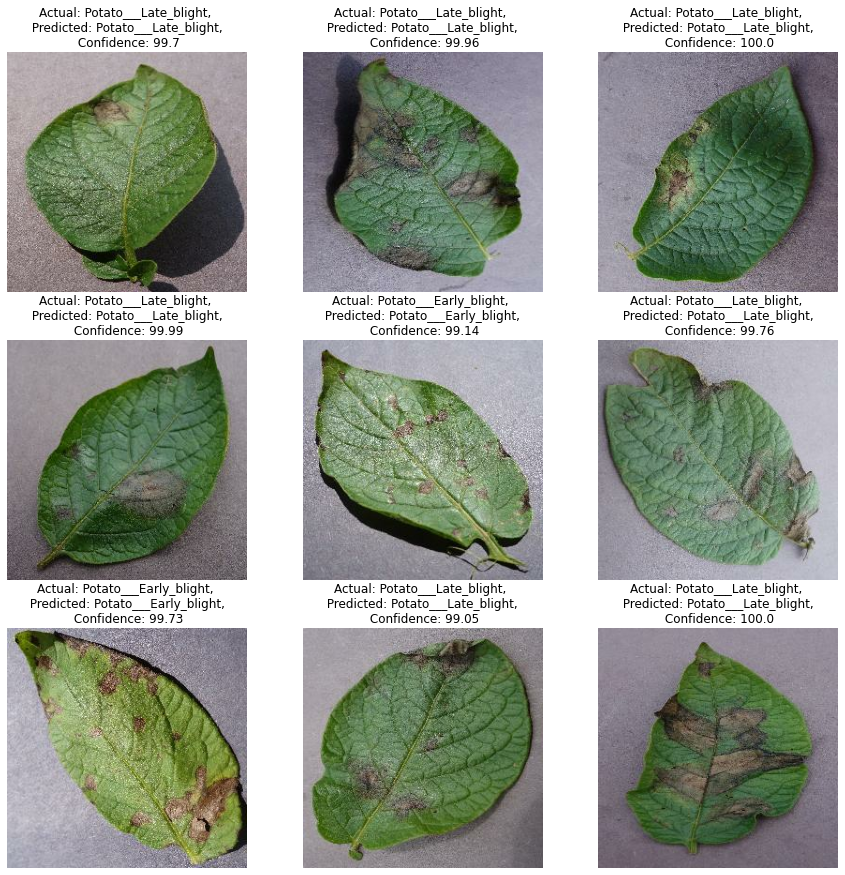

In [47]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        #Calling the predicted_class and confidence using the model and images
        predicted_class, confidence = predict(model, images[i].numpy())
        
        #Actual class
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}')
        
        plt.axis('off')

In [52]:
# SKIP THIS CELL AND RUN THE NEXT 2 CELLS
model_version = 1
model.save(f'/content/saved_models/{model_version}')

INFO:tensorflow:Assets written to: /content/saved_models/1/assets


In [53]:
import os
os.listdir('/content/saved_models') #Returns a string

['1']

In [54]:
 # +1 gives nxt version to be saved
model_version = max([int(i) for i in os.listdir('/content/saved_models')]) + 1
model.save(f'/content/saved_models/{model_version}')

INFO:tensorflow:Assets written to: /content/saved_models/2/assets
